In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station=Base.classes.station
measurement=Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

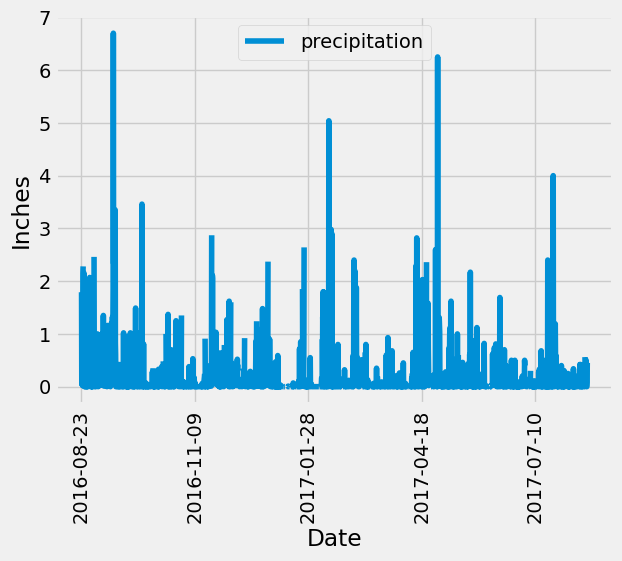

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. ####LINE GRAPH (NOT BAR)
# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= dt.date(2016, 8, 23)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# column_names = ["date", "prcp"]
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
# sorted_df = df.sort_values(by=['date'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper center')
plt.show()

In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station).count()
print(f"Total Stations: {total_stations}")

Total Stations: 9


In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations_query = session.query(
    measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature. (func)
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


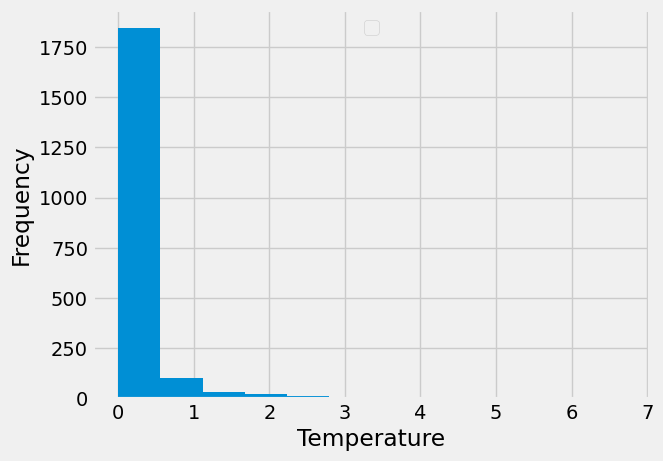

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram (12 bins--- list of tobs- temperatures)
session.query(measurement.date, measurement.tobs).\
filter(measurement.station == 'USC00519281').\
filter(measurement.date >= dt.date(2016, 8, 23)).\
    order_by(measurement.tobs.desc()).first()
    

#create dataframe
df = pd.DataFrame(results, columns=['date', 'tobs'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()

#create histogram with 12 bins
plt.hist(df['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc='upper center')  
plt.show()

Text(0.5, 4.183333333333314, 'Temperature')

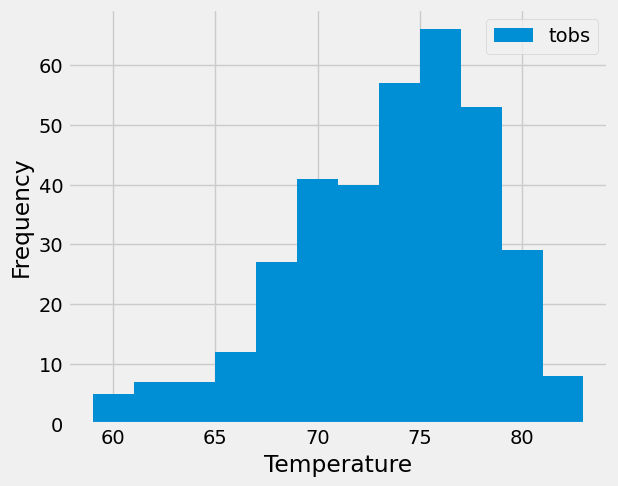

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram (12 bins--- list of tobs- temperatures)


# Close Session

In [16]:
# Close Session
session.close()